In [48]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [88]:
wine = load_wine()
X = wine.data
y = wine.target
features = wine.feature_names
# 標準化資料
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X)

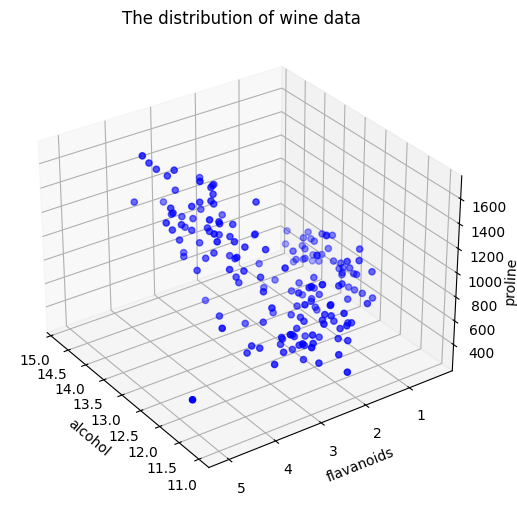

In [91]:
# 取出三個變數: bmi, bp, s6 來簡單地看資料分佈
small_data = wine.data[:300, [0,6, -1]]
warnings.filterwarnings("ignore") # 關掉warning

fig, ax = plt.subplots(figsize = (8,6))
ax = plt.subplot(projection = "3d")
ax.view_init(azim=145, elev=30) # 設定方位角和仰角

x = [row[0] for row in small_data]
y = [row[1] for row in small_data]
z = [row[2] for row in small_data]

ax.scatter(x, y, z, c='blue', marker='o')
ax.set_xlabel("alcohol")
ax.set_ylabel("flavanoids")
ax.set_zlabel("proline", labelpad=1)
ax.set_title("The distribution of wine data")
plt.show()

In [92]:
# 利用DBSCAN來分群
clusters = DBSCAN(eps=3, min_samples=2).fit(X=X_scaled) # eps: 控制圓大小 ; min_samples: 圓內點的數量
labels = clusters.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [93]:
# sklearn demo 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 5


In [94]:
# sklearn demo 
print(f"Homogeneity: {homogeneity_score(y, labels):.3f}")
print(f"Completeness: {completeness_score(y, labels):.3f}")
print(f"V-measure: {v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

Homogeneity: 0.054
Completeness: 0.943
V-measure: 0.102
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.010
Silhouette Coefficient: -0.475


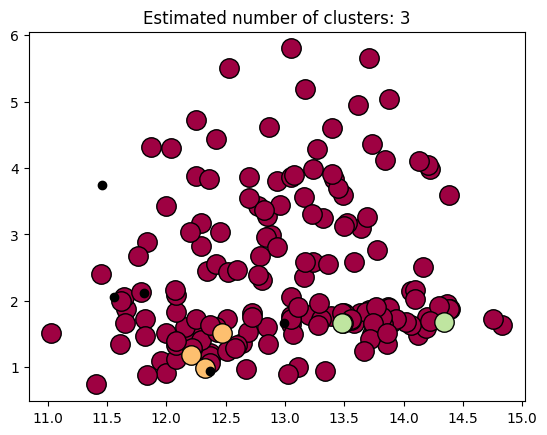

In [95]:
# sklearn demo 
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clusters.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()